In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [105]:
pd.set_option('display.max_columns', 100)

In [2]:
df=pd.read_csv('Train.csv')

### Missing Values in Item_Weight and Outlet_Size


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Problems
- Fill null values
- find meaningful correlation wrt Item_Outlet_Sales

In [4]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


### Filling Null Values

In [5]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
df_group = df.groupby(['Item_Type','Item_Fat_Content'],as_index=True).mean()['Item_Weight']
df_group=df_group.add_suffix('').reset_index()
df_group

,Item_Type,Item_Fat_Content,Item_Weight
0,Baking Goods,LF,12.052500
1,Baking Goods,Low Fat,12.633128
2,Baking Goods,Regular,11.976126
3,Baking Goods,low fat,10.060000
4,Baking Goods,reg,12.825000
...,...,...,...
65,Starchy Foods,LF,14.375000
66,Starchy Foods,Low Fat,13.669692
67,Starchy Foods,Regular,13.757200
68,Starchy Foods,low fat,14.150000


In [7]:
L=df[df['Item_Weight'].isnull()].index

fat_type=df['Item_Fat_Content'].unique()
item_type=df['Item_Type'].unique()

for ind in L:
    for x in item_type:
        for y in fat_type:
            val=list(df_group[(df_group['Item_Fat_Content']==y) & (df_group['Item_Type']==x)]['Item_Weight'])
            if len(val)>0:
#                 df.loc[ind,'Item_Weight'] = np.where((df['Item_Fat_Content']==y) & (df['Item_Type'] == x), val[0], df['Item_Weight'])
                df.loc[ind,'Item_Weight'] = val

In [8]:
df['Outlet_Size'].fillna(method='ffill',inplace=True)

In [9]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [10]:
data=df.copy()

### Removing Outliers

In [11]:
from scipy import stats

In [12]:
ls = ['float64','float32','int32','int64']
df.select_dtypes(ls).columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [13]:
df=df[(np.abs(stats.zscore(df['Item_Outlet_Sales']))<3)]
df=df[(np.abs(stats.zscore(df['Item_Weight']))<3)]
df=df[(np.abs(stats.zscore(df['Item_Visibility']))<3)]
df=df[(np.abs(stats.zscore(df['Item_MRP']))<3)]

In [14]:
df['Outlet_Establishment_Year']=df['Outlet_Establishment_Year'].astype(str)

In [15]:
df.reset_index(drop=True,inplace=True)

In [16]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
count,8338.000000,8338.000000,8338.000000,8338.00000
mean,12.711583,0.063975,140.094906,2134.49012
std,4.266046,0.047386,61.925137,1580.16083
min,4.555000,0.000000,31.290000,33.29000
25%,9.300000,0.026867,93.354100,852.22400
50%,11.941250,0.053293,141.948300,1794.33100
75%,16.100000,0.093308,184.784500,3075.99600
max,21.350000,0.220226,266.888400,7298.49960


<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Count'>

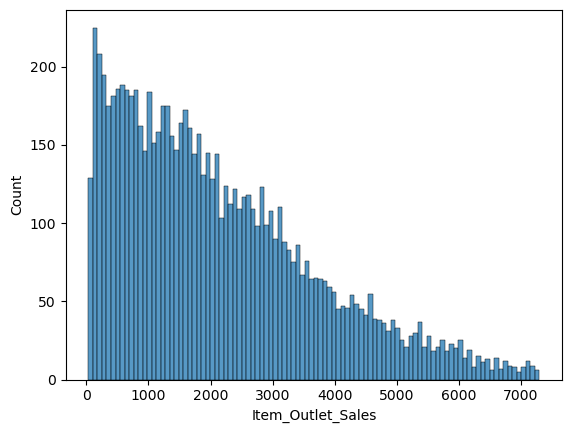

In [17]:
sns.histplot(df['Item_Outlet_Sales'],bins=100)

<AxesSubplot:>

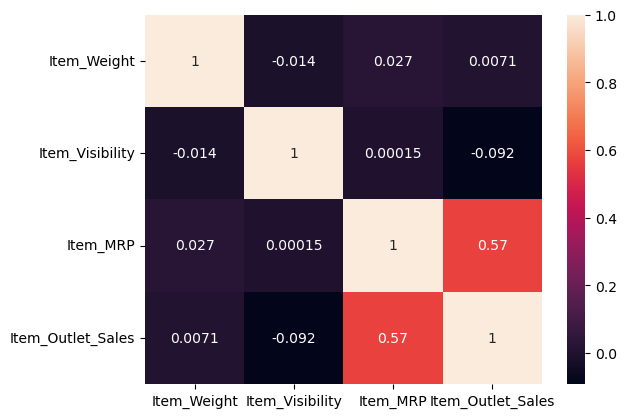

In [18]:
sns.heatmap(df.corr(),annot=True)

In [19]:
from scipy.stats import skew

Item_Weight
0.19120365915382082


C:\Users\Shubh Pundir\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


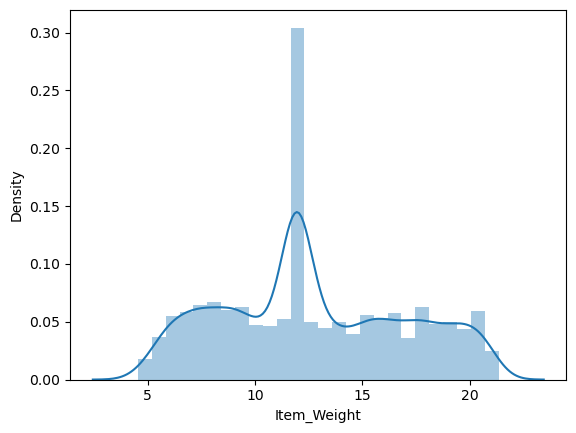

Item_Visibility
0.794129004928815


C:\Users\Shubh Pundir\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


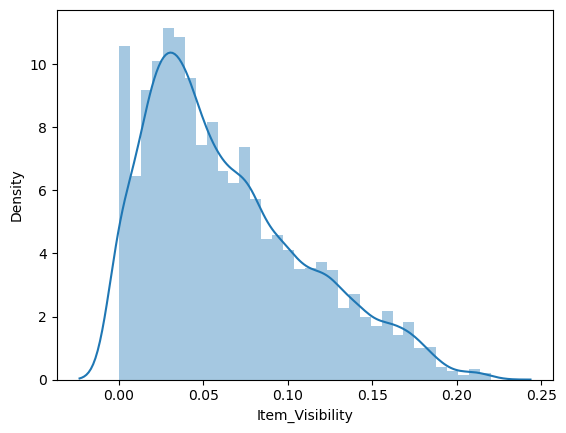

Item_MRP
0.13896530387116676


C:\Users\Shubh Pundir\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


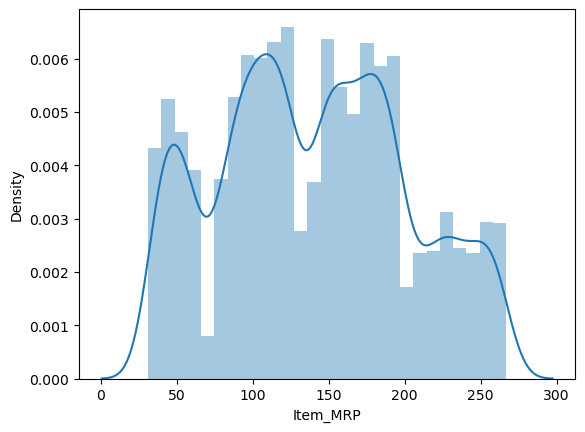

C:\Users\Shubh Pundir\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Item_Outlet_Sales
0.8781088107735762


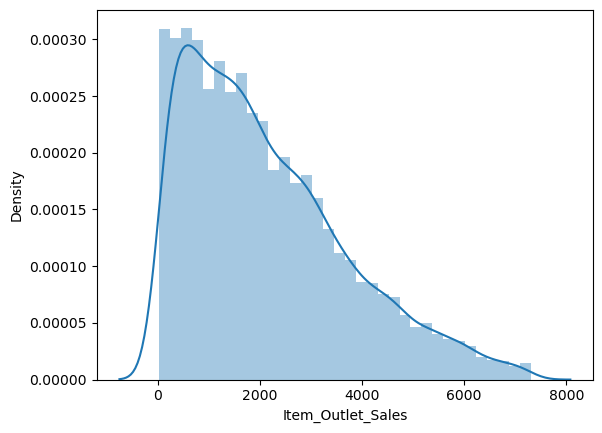

In [20]:
for col in df.select_dtypes(['int64','float64']).columns:
    print(col)
    print(skew(df[col]))
    plt.figure()
    sns.distplot(df[col])
    plt.show()

In [21]:
df['Item_Outlet_Sales_Log']=np.log(df['Item_Outlet_Sales'])
df['Item_Outlet_Sales_Reciprocal']=1/(df['Item_Outlet_Sales'])
df['Item_Outlet_Sales_SQRT']=np.sqrt(df['Item_Outlet_Sales'])
df['Item_Outlet_Sales_BOXCOX'],parameters=stats.boxcox(df['Item_Outlet_Sales'])

---------------------------------------------------------------------------
Item_Outlet_Sales
Skewness:  0.8781088107735762
---------------------------------------------------------------------------


C:\Users\Shubh Pundir\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


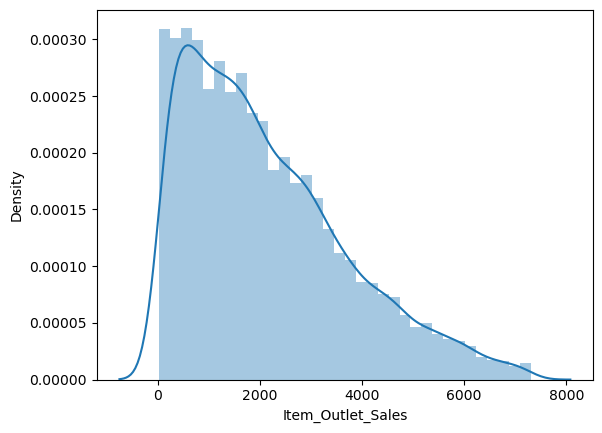

---------------------------------------------------------------------------
Item_Outlet_Sales_Log
Skewness:  -0.9421768604101107
---------------------------------------------------------------------------


C:\Users\Shubh Pundir\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


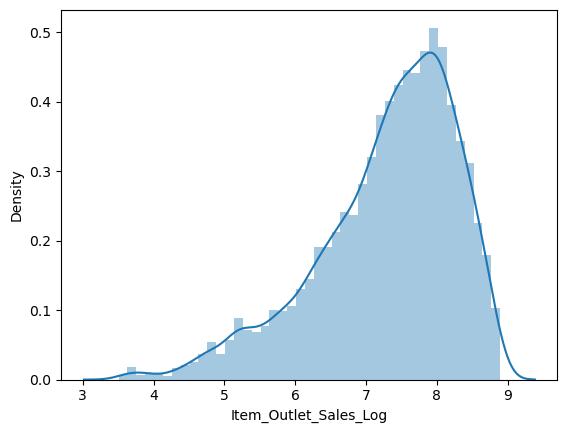

---------------------------------------------------------------------------
Item_Outlet_Sales_Reciprocal
Skewness:  5.827892639443801
---------------------------------------------------------------------------


C:\Users\Shubh Pundir\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


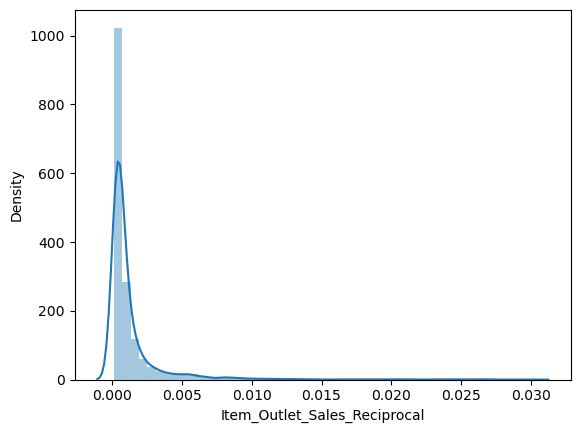

---------------------------------------------------------------------------
Item_Outlet_Sales_SQRT
Skewness:  0.11225437022962524
---------------------------------------------------------------------------


C:\Users\Shubh Pundir\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


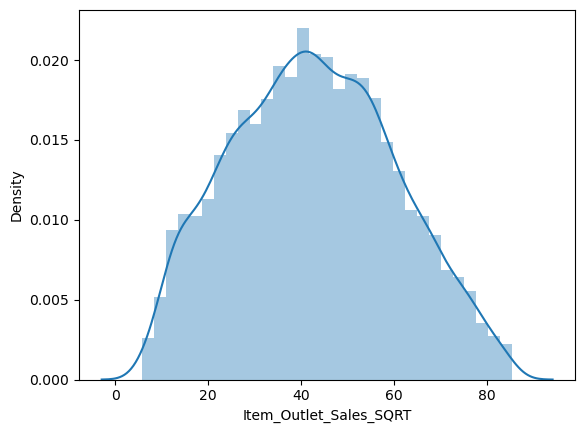

---------------------------------------------------------------------------
Item_Outlet_Sales_BOXCOX
Skewness:  -0.09470691195002759
---------------------------------------------------------------------------


C:\Users\Shubh Pundir\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


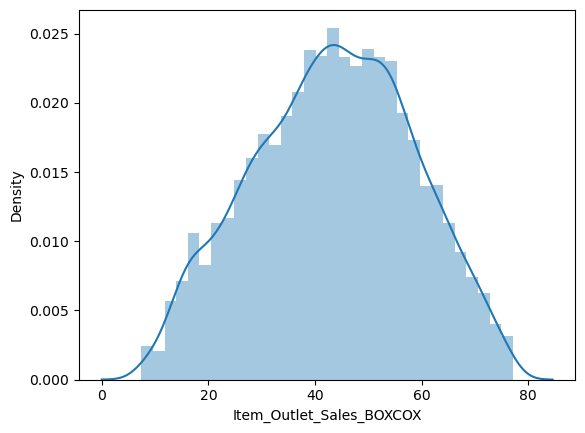

In [22]:
for col in ['Item_Outlet_Sales',
            'Item_Outlet_Sales_Log',
            'Item_Outlet_Sales_Reciprocal',
            'Item_Outlet_Sales_SQRT',
            'Item_Outlet_Sales_BOXCOX']:
    print('-'*75)
    print(col)
    print('Skewness: ',skew(df[col]))
    print('-'*75)
    plt.figure()
    sns.distplot(df[col])
    plt.show()
    

#### BoxCox method is selected on Item_Outlet_Sales

In [23]:
df.drop(['Item_Outlet_Sales_Reciprocal','Item_Outlet_Sales_Log'],axis=1,inplace=True)

In [24]:
df.drop(['Item_Outlet_Sales_SQRT'],axis=1,inplace=True)

In [25]:
data=df.copy()

In [30]:
df=df[df["Item_Visibility"]>0]

In [33]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Outlet_Sales_BOXCOX
0,FDA15,9.30000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,59.004256
1,DRC01,5.92000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,24.528125
2,FDN15,17.50000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,46.733445
3,FDO10,13.65000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528,21.990538
4,FDP10,11.94125,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,60.788510


In [32]:
df.reset_index(drop=True,inplace=True)

In [38]:
df['Outlet_Establishment_Year'].unique()

array(['1999', '2009', '1998', '1987', '1985', '2002', '2007', '1997',
       '2004'], dtype=object)

### Ordinal Encoding on Outlet_Size and Outlet_Location_Type

In [36]:
df['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [38]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Outlet_Sales_BOXCOX
0,FDA15,9.30000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,3,Supermarket Type1,3735.1380,59.004256
1,DRC01,5.92000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,1,Supermarket Type2,443.4228,24.528125
2,FDN15,17.50000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,3,Supermarket Type1,2097.2700,46.733445
3,FDO10,13.65000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,1,Supermarket Type1,343.5528,21.990538
4,FDP10,11.94125,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,1,Supermarket Type3,4022.7636,60.788510
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7812,FDF22,6.86500,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,1,Supermarket Type1,2778.3834,52.372930
7813,FDS36,8.38000,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,High,2,Supermarket Type1,549.2850,26.858052
7814,NCJ29,10.60000,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,2,Supermarket Type1,1193.1136,37.106254
7815,FDN46,7.21000,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,1,Supermarket Type2,1845.5976,44.365011


In [37]:
df['Outlet_Location_Type'].replace({'Tier 1':3,
                                    'Tier 2':2,
                                    'Tier 3':1},inplace=True)

C:\Users\Shubh Pundir\AppData\Local\Temp\ipykernel_3632\1092171258.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Outlet_Location_Type'].replace({'Tier 1':3,


In [39]:
df['Outlet_Size'].unique()

array(['Medium', 'High', 'Small'], dtype=object)

In [40]:
df['Outlet_Size'].replace({'High':3,
                           'Medium':2,
                           'Small':1},inplace=True)

C:\Users\Shubh Pundir\AppData\Local\Temp\ipykernel_3632\3541255105.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Outlet_Size'].replace({'High':3,


In [41]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Outlet_Sales_BOXCOX
0,FDA15,9.30000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,2,3,Supermarket Type1,3735.1380,59.004256
1,DRC01,5.92000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,2,1,Supermarket Type2,443.4228,24.528125
2,FDN15,17.50000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,2,3,Supermarket Type1,2097.2700,46.733445
3,FDO10,13.65000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,3,1,Supermarket Type1,343.5528,21.990538
4,FDP10,11.94125,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,2,1,Supermarket Type3,4022.7636,60.788510


In [42]:
data=df.copy()

### Item_Fat_Content

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Count'>

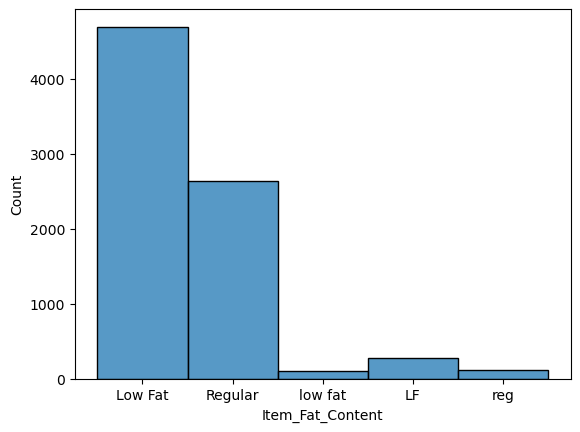

In [50]:
sns.histplot(df['Item_Fat_Content'])

In [51]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [54]:
## Group low fat and LF as Low Fat
## and Regular as reg
df['Item_Fat_Content'].replace({'LF':'Low Fat',
                                'low fat':'Low Fat',
                                'Reg':'Regular'},inplace=True)

C:\Users\Shubh Pundir\AppData\Local\Temp\ipykernel_3632\3740722867.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Item_Fat_Content'].replace({'LF':'Low Fat',


In [55]:
df['Item_Fat_Content'].value_counts()

Low Fat    5068
Regular    2749
Name: Item_Fat_Content, dtype: int64

In [61]:
Item_Fat_Content = df[["Item_Fat_Content"]]
Item_Fat_Content = pd.get_dummies(Item_Fat_Content, drop_first = True)
Item_Fat_Content.head()

,Item_Fat_Content_Regular
0,0
1,1
2,0
3,1
4,0


### Item_Type

In [81]:
df.groupby(['Item_Type'],as_index=True).mean()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Item_Outlet_Sales_BOXCOX
Item_Type,,,,,,,
Baking Goods,12.267185,0.071904,127.450329,1.744932,1.898649,1972.345901,41.917393
Breads,11.446424,0.068804,141.069301,1.721739,1.847826,2169.066398,43.753776
Breakfast,12.767661,0.083783,139.925479,1.811881,1.891089,2001.427760,41.402131
Canned,12.246172,0.070414,139.769817,1.747941,1.891269,2197.936328,44.236989
Dairy,13.241605,0.074009,147.170582,1.740681,1.918963,2090.591497,42.865105
Frozen Foods,12.753574,0.067543,137.290413,1.757306,1.918679,2089.601879,42.813807
Fruits and Vegetables,13.049762,0.071120,142.757263,1.763653,1.880931,2214.716643,44.091522
Hard Drinks,11.472700,0.068559,136.600815,1.855670,1.865979,2131.472901,43.343442
Health and Hygiene,12.863807,0.057845,130.569574,1.796680,1.858921,1983.358803,42.088341


In [82]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Item_Outlet_Sales_BOXCOX
count,7817.000000,7817.000000,7817.000000,7817.000000,7817.000000,7817.000000,7817.000000
mean,12.727758,0.068239,140.270068,1.764232,1.891007,2132.863343,43.374059
std,4.267707,0.045870,61.839554,0.696394,0.809768,1577.719063,15.104548
min,4.555000,0.003575,31.290000,1.000000,1.000000,33.290000,7.415305
25%,9.300000,0.031187,93.612000,1.000000,1.000000,852.224000,32.283423
50%,11.941250,0.056884,142.083800,2.000000,2.000000,1797.660000,43.891715
75%,16.100000,0.096734,184.824000,2.000000,3.000000,3072.667000,54.544813
max,21.350000,0.220226,266.888400,3.000000,3.000000,7298.499600,77.122588


In [84]:
data=df.copy()

In [83]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Outlet_Sales_BOXCOX
0,FDA15,9.30000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,2,3,Supermarket Type1,3735.1380,59.004256
1,DRC01,5.92000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,2,1,Supermarket Type2,443.4228,24.528125
2,FDN15,17.50000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,2,3,Supermarket Type1,2097.2700,46.733445
3,FDO10,13.65000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,3,1,Supermarket Type1,343.5528,21.990538
4,FDP10,11.94125,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,2,1,Supermarket Type3,4022.7636,60.788510


In [85]:
data.to_csv('Data.csv')

In [73]:
df.groupby(['Item_Type'],as_index=True).mean()['Item_Outlet_Sales'].sort_values().reset_index()

,Item_Type,Item_Outlet_Sales
0,Others,1917.390940
1,Soft Drinks,1935.242104
2,Baking Goods,1972.345901
3,Health and Hygiene,1983.358803
4,Breakfast,2001.427760
5,Frozen Foods,2089.601879
6,Dairy,2090.591497
7,Hard Drinks,2131.472901
8,Meat,2153.873037
9,Breads,2169.066398


In [90]:
## Grouping Item_Type from basic logic to reduce the dimensions
df['Item_Type']=df['Item_Type'].replace({'Breakfast':'Group1',
                                         'Baking Goods':'Group1',
                                         'Breads':'Group1',
                                         'Fruits and Vegetables':'Group1',
                                         'Starchy Foods':'Group1',
                                         'Canned':'Group2',
                                         'Dairy':'Group2',
                                         'Frozen Foods':'Group2',
                                         'Meat':'Group3',
                                         'Seafood':'Group3',
                                         'Snack Foods':'Group4',
                                         'Soft Drinks':'Group4',
                                         'Hard Drinks':'Group4',
                                         'Household':'Group5',
                                         'Health and Hygiene':'Group5',
                                         'Others':'Group5',
})

C:\Users\Shubh Pundir\AppData\Local\Temp\ipykernel_3632\1512754536.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Item_Type']=df['Item_Type'].replace({'Breakfast':'Group1',


<AxesSubplot:>

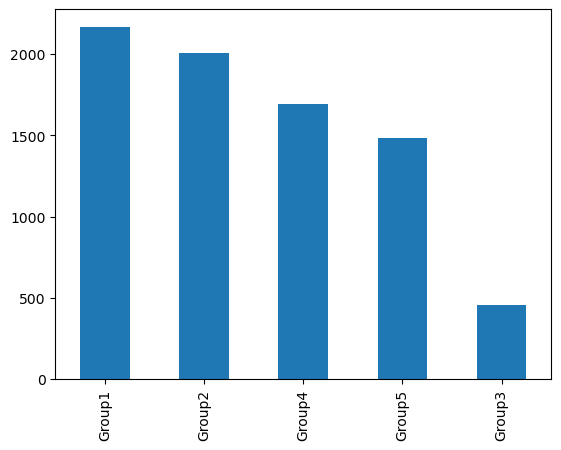

In [93]:
df['Item_Type'].value_counts().plot(kind='bar')

In [96]:
df[["Item_Type"]]

,Item_Type
0,Group2
1,Group4
2,Group3
3,Group4
4,Group4
...,...
7812,Group4
7813,Group1
7814,Group5
7815,Group4


In [97]:
Item_Type = df[["Item_Type"]]
Item_Type = pd.get_dummies(Item_Type, drop_first = True)
Item_Type.head()

,Item_Type_Group2,Item_Type_Group3,Item_Type_Group4,Item_Type_Group5
0,1,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,1,0


### Outlet_Identifier

In [98]:
Outlet_Identifier = df[["Outlet_Identifier"]]
Outlet_Identifier = pd.get_dummies(Outlet_Identifier, drop_first = True)
Outlet_Identifier.head()

,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0


### Outlet_Establishment_Year

In [99]:
Outlet_Establishment_Year = df[["Outlet_Establishment_Year"]]
Outlet_Establishment_Year = pd.get_dummies(Outlet_Establishment_Year, drop_first = True)
Outlet_Establishment_Year.head()

,Outlet_Establishment_Year_1987,Outlet_Establishment_Year_1997,Outlet_Establishment_Year_1998,Outlet_Establishment_Year_1999,Outlet_Establishment_Year_2002,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009
0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,1
2,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0


### Outlet_Type

In [101]:
Outlet_Type = df[["Outlet_Type"]]
Outlet_Type = pd.get_dummies(Outlet_Type, drop_first = True)
Outlet_Type.head()

,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,1,0,0
1,0,1,0
2,1,0,0
3,1,0,0
4,0,0,1


In [100]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Outlet_Sales_BOXCOX
0,FDA15,9.30000,Low Fat,0.016047,Group2,249.8092,OUT049,1999,2,3,Supermarket Type1,3735.1380,59.004256
1,DRC01,5.92000,Regular,0.019278,Group4,48.2692,OUT018,2009,2,1,Supermarket Type2,443.4228,24.528125
2,FDN15,17.50000,Low Fat,0.016760,Group3,141.6180,OUT049,1999,2,3,Supermarket Type1,2097.2700,46.733445
3,FDO10,13.65000,Regular,0.012741,Group4,57.6588,OUT013,1987,3,1,Supermarket Type1,343.5528,21.990538
4,FDP10,11.94125,Low Fat,0.127470,Group4,107.7622,OUT027,1985,2,1,Supermarket Type3,4022.7636,60.788510
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7812,FDF22,6.86500,Low Fat,0.056783,Group4,214.5218,OUT013,1987,3,1,Supermarket Type1,2778.3834,52.372930
7813,FDS36,8.38000,Regular,0.046982,Group1,108.1570,OUT045,2002,3,2,Supermarket Type1,549.2850,26.858052
7814,NCJ29,10.60000,Low Fat,0.035186,Group5,85.1224,OUT035,2004,1,2,Supermarket Type1,1193.1136,37.106254
7815,FDN46,7.21000,Regular,0.145221,Group4,103.1332,OUT018,2009,2,1,Supermarket Type2,1845.5976,44.365011


In [102]:
data=df.copy()

In [103]:
df = pd.concat([df, Item_Fat_Content, Item_Type, Outlet_Identifier,Outlet_Establishment_Year,Outlet_Type], axis = 1)

In [107]:
data=df.copy()

In [108]:
data.to_csv('Data.csv')

In [109]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Outlet_Sales_BOXCOX,Item_Fat_Content_Regular,Item_Type_Group2,Item_Type_Group3,Item_Type_Group4,Item_Type_Group5,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Establishment_Year_1987,Outlet_Establishment_Year_1997,Outlet_Establishment_Year_1998,Outlet_Establishment_Year_1999,Outlet_Establishment_Year_2002,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDA15,9.30000,Low Fat,0.016047,Group2,249.8092,OUT049,1999,2,3,Supermarket Type1,3735.1380,59.004256,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
1,DRC01,5.92000,Regular,0.019278,Group4,48.2692,OUT018,2009,2,1,Supermarket Type2,443.4228,24.528125,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2,FDN15,17.50000,Low Fat,0.016760,Group3,141.6180,OUT049,1999,2,3,Supermarket Type1,2097.2700,46.733445,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
3,FDO10,13.65000,Regular,0.012741,Group4,57.6588,OUT013,1987,3,1,Supermarket Type1,343.5528,21.990538,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,FDP10,11.94125,Low Fat,0.127470,Group4,107.7622,OUT027,1985,2,1,Supermarket Type3,4022.7636,60.788510,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7812,FDF22,6.86500,Low Fat,0.056783,Group4,214.5218,OUT013,1987,3,1,Supermarket Type1,2778.3834,52.372930,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
7813,FDS36,8.38000,Regular,0.046982,Group1,108.1570,OUT045,2002,3,2,Supermarket Type1,549.2850,26.858052,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0
7814,NCJ29,10.60000,Low Fat,0.035186,Group5,85.1224,OUT035,2004,1,2,Supermarket Type1,1193.1136,37.106254,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0
7815,FDN46,7.21000,Regular,0.145221,Group4,103.1332,OUT018,2009,2,1,Supermarket Type2,1845.5976,44.365011,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [110]:
df.drop(['Item_Identifier',
         'Item_Fat_Content',
         'Item_Type',
         'Outlet_Identifier',
         'Outlet_Establishment_Year',
         'Outlet_Type'
         ],axis=1,inplace=True)

In [111]:
df.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Item_Outlet_Sales_BOXCOX,Item_Fat_Content_Regular,Item_Type_Group2,Item_Type_Group3,Item_Type_Group4,Item_Type_Group5,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Establishment_Year_1987,Outlet_Establishment_Year_1997,Outlet_Establishment_Year_1998,Outlet_Establishment_Year_1999,Outlet_Establishment_Year_2002,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30000,0.016047,249.8092,2,3,3735.1380,59.004256,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
1,5.92000,0.019278,48.2692,2,1,443.4228,24.528125,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2,17.50000,0.016760,141.6180,2,3,2097.2700,46.733445,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
3,13.65000,0.012741,57.6588,3,1,343.5528,21.990538,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,11.94125,0.127470,107.7622,2,1,4022.7636,60.788510,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [113]:
df

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Item_Outlet_Sales_BOXCOX,Item_Fat_Content_Regular,Item_Type_Group2,Item_Type_Group3,Item_Type_Group4,Item_Type_Group5,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Establishment_Year_1987,Outlet_Establishment_Year_1997,Outlet_Establishment_Year_1998,Outlet_Establishment_Year_1999,Outlet_Establishment_Year_2002,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30000,0.016047,249.8092,2,3,3735.1380,59.004256,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
1,5.92000,0.019278,48.2692,2,1,443.4228,24.528125,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2,17.50000,0.016760,141.6180,2,3,2097.2700,46.733445,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
3,13.65000,0.012741,57.6588,3,1,343.5528,21.990538,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,11.94125,0.127470,107.7622,2,1,4022.7636,60.788510,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7812,6.86500,0.056783,214.5218,3,1,2778.3834,52.372930,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
7813,8.38000,0.046982,108.1570,3,2,549.2850,26.858052,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0
7814,10.60000,0.035186,85.1224,1,2,1193.1136,37.106254,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0
7815,7.21000,0.145221,103.1332,2,1,1845.5976,44.365011,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [114]:
df['Item_Visibility_Log']=np.log(df['Item_Visibility'])
df['Item_Visibility_Reciprocal']=1/(df['Item_Visibility'])
df['Item_Visibility_SQRT']=np.sqrt(df['Item_Visibility'])
df['Item_Visibility_BOXCOX'],parameters=stats.boxcox(df['Item_Visibility'])

Item_Visibility
Skewness:  0.8368117852606101


C:\Users\Shubh Pundir\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


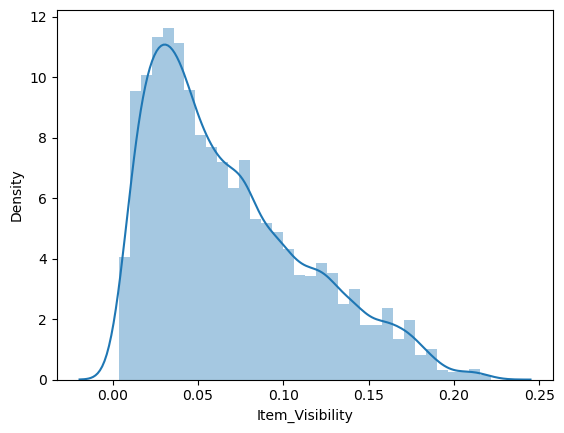

VisLog
Skewness:  -0.48729669891369326


C:\Users\Shubh Pundir\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


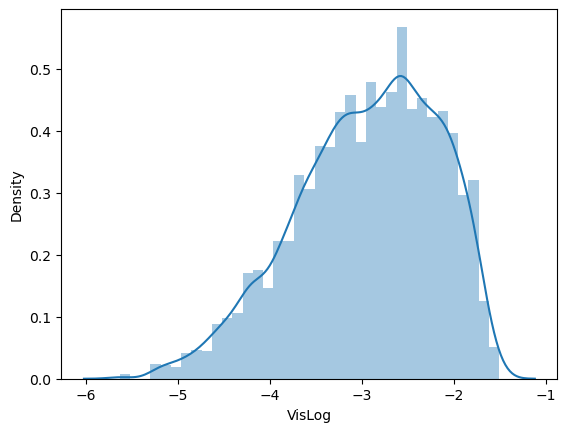

C:\Users\Shubh Pundir\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


VisReciprocal
Skewness:  3.050327572734456


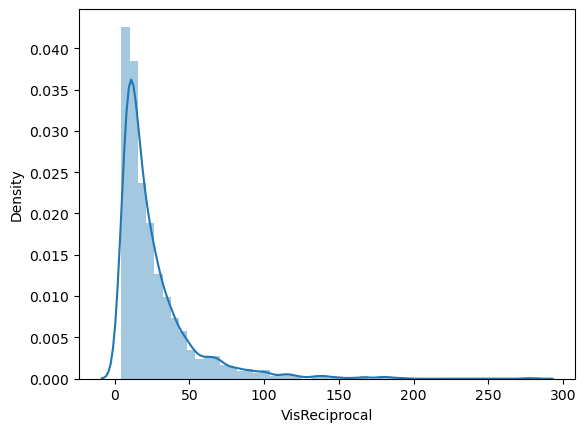

VisSqrt
Skewness:  0.24694203607210197


C:\Users\Shubh Pundir\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


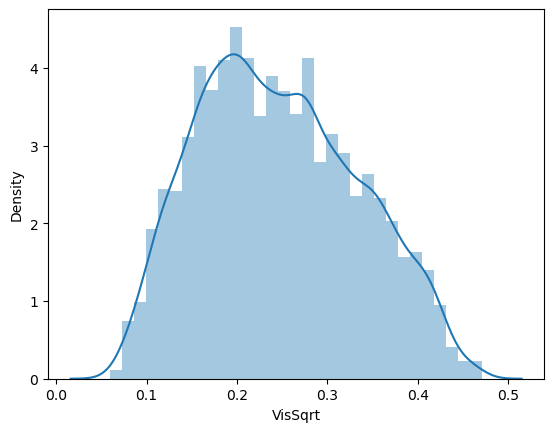

Vis_Boxcox
Skewness:  -0.05430363885642747


C:\Users\Shubh Pundir\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


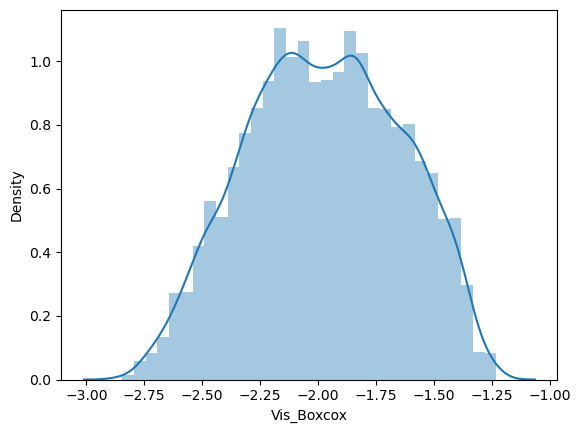

In [102]:
for col in ['Item_Visibility','VisLog','VisReciprocal','VisSqrt','Vis_Boxcox']:
    print(col)
    print('Skewness: ',skew(df[col]))
    plt.figure()
    sns.distplot(df[col])
    plt.show()

#### Square Root method is used for Item_Visibility

In [115]:
df.drop(['Item_Visibility_Reciprocal',
         'Item_Visibility_Log',
         'Item_Visibility_BOXCOX'
        ],
        axis=1,
        inplace=True)
df.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Item_Outlet_Sales_BOXCOX,Item_Fat_Content_Regular,Item_Type_Group2,Item_Type_Group3,Item_Type_Group4,Item_Type_Group5,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Establishment_Year_1987,Outlet_Establishment_Year_1997,Outlet_Establishment_Year_1998,Outlet_Establishment_Year_1999,Outlet_Establishment_Year_2002,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Visibility_SQRT
0,9.30000,0.016047,249.8092,2,3,3735.1380,59.004256,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0.126678
1,5.92000,0.019278,48.2692,2,1,443.4228,24.528125,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0.138846
2,17.50000,0.016760,141.6180,2,3,2097.2700,46.733445,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0.129461
3,13.65000,0.012741,57.6588,3,1,343.5528,21.990538,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0.112876
4,11.94125,0.127470,107.7622,2,1,4022.7636,60.788510,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.357029


In [116]:
data=df.copy()

In [119]:
Item_Fat_Content.columns

Index(['Item_Fat_Content_Regular'], dtype='object')

In [120]:
Item_Type.columns

Index(['Item_Type_Group2', 'Item_Type_Group3', 'Item_Type_Group4',
       'Item_Type_Group5'],
      dtype='object')

In [121]:
Outlet_Identifier.columns

Index(['Outlet_Identifier_OUT013', 'Outlet_Identifier_OUT017',
       'Outlet_Identifier_OUT018', 'Outlet_Identifier_OUT019',
       'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT035',
       'Outlet_Identifier_OUT045', 'Outlet_Identifier_OUT046',
       'Outlet_Identifier_OUT049'],
      dtype='object')

In [122]:
Outlet_Establishment_Year.columns

Index(['Outlet_Establishment_Year_1987', 'Outlet_Establishment_Year_1997',
       'Outlet_Establishment_Year_1998', 'Outlet_Establishment_Year_1999',
       'Outlet_Establishment_Year_2002', 'Outlet_Establishment_Year_2004',
       'Outlet_Establishment_Year_2007', 'Outlet_Establishment_Year_2009'],
      dtype='object')

In [123]:
Outlet_Type.columns

Index(['Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3'],
      dtype='object')

In [133]:
df_encode=df[['Item_Fat_Content_Regular',
              'Item_Type_Group2',
              'Item_Type_Group3',
              'Item_Type_Group4',
              'Item_Type_Group5',
              'Outlet_Identifier_OUT013',
              'Outlet_Identifier_OUT017',
              'Outlet_Identifier_OUT018',
              'Outlet_Identifier_OUT019',
              'Outlet_Identifier_OUT027',
              'Outlet_Identifier_OUT035',
              'Outlet_Identifier_OUT045',
              'Outlet_Identifier_OUT046',
              'Outlet_Identifier_OUT049',
              'Outlet_Establishment_Year_1987',
              'Outlet_Establishment_Year_1997',
              'Outlet_Establishment_Year_1998',
              'Outlet_Establishment_Year_1999',
              'Outlet_Establishment_Year_1997',
              'Outlet_Establishment_Year_2002',
              'Outlet_Establishment_Year_2004',
              'Outlet_Establishment_Year_2007',
              'Outlet_Establishment_Year_2009',
              'Outlet_Type_Supermarket Type1',
              'Outlet_Type_Supermarket Type2',
              'Outlet_Type_Supermarket Type3',
             ]]

In [118]:
df_numeric=df[['Item_Weight',
               'Item_Visibility',
               'Item_MRP',
               'Outlet_Size',
               'Outlet_Location_Type',
               'Item_Outlet_Sales',
               'Item_Outlet_Sales_BOXCOX',
               'Item_Visibility_SQRT'
              ]]

In [134]:
df_encode

,Item_Fat_Content_Regular,Outlet_Identifier_OUT013,Item_Type_Group2,Item_Type_Group3,Item_Type_Group4,Item_Type_Group5,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Establishment_Year_1987,Outlet_Establishment_Year_1997,Outlet_Establishment_Year_1997,Outlet_Establishment_Year_1997,Outlet_Establishment_Year_1997,Outlet_Establishment_Year_1997,Outlet_Establishment_Year_1997,Outlet_Establishment_Year_1997,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7812,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
7813,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
7814,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
7815,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [135]:
df_numeric

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Item_Outlet_Sales_BOXCOX,Item_Visibility_SQRT
0,9.30000,0.016047,249.8092,2,3,3735.1380,59.004256,0.126678
1,5.92000,0.019278,48.2692,2,1,443.4228,24.528125,0.138846
2,17.50000,0.016760,141.6180,2,3,2097.2700,46.733445,0.129461
3,13.65000,0.012741,57.6588,3,1,343.5528,21.990538,0.112876
4,11.94125,0.127470,107.7622,2,1,4022.7636,60.788510,0.357029
...,...,...,...,...,...,...,...,...
7812,6.86500,0.056783,214.5218,3,1,2778.3834,52.372930,0.238293
7813,8.38000,0.046982,108.1570,3,2,549.2850,26.858052,0.216754
7814,10.60000,0.035186,85.1224,1,2,1193.1136,37.106254,0.187580
7815,7.21000,0.145221,103.1332,2,1,1845.5976,44.365011,0.381078


In [130]:
df

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Item_Outlet_Sales_BOXCOX,Item_Fat_Content_Regular,Item_Type_Group2,Item_Type_Group3,Item_Type_Group4,Item_Type_Group5,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Establishment_Year_1987,Outlet_Establishment_Year_1997,Outlet_Establishment_Year_1998,Outlet_Establishment_Year_1999,Outlet_Establishment_Year_2002,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Visibility_SQRT
0,9.30000,0.016047,249.8092,2,3,3735.1380,59.004256,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0.126678
1,5.92000,0.019278,48.2692,2,1,443.4228,24.528125,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0.138846
2,17.50000,0.016760,141.6180,2,3,2097.2700,46.733445,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0.129461
3,13.65000,0.012741,57.6588,3,1,343.5528,21.990538,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0.112876
4,11.94125,0.127470,107.7622,2,1,4022.7636,60.788510,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.357029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7812,6.86500,0.056783,214.5218,3,1,2778.3834,52.372930,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0.238293
7813,8.38000,0.046982,108.1570,3,2,549.2850,26.858052,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0.216754
7814,10.60000,0.035186,85.1224,1,2,1193.1136,37.106254,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0.187580
7815,7.21000,0.145221,103.1332,2,1,1845.5976,44.365011,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0.381078


<AxesSubplot:>

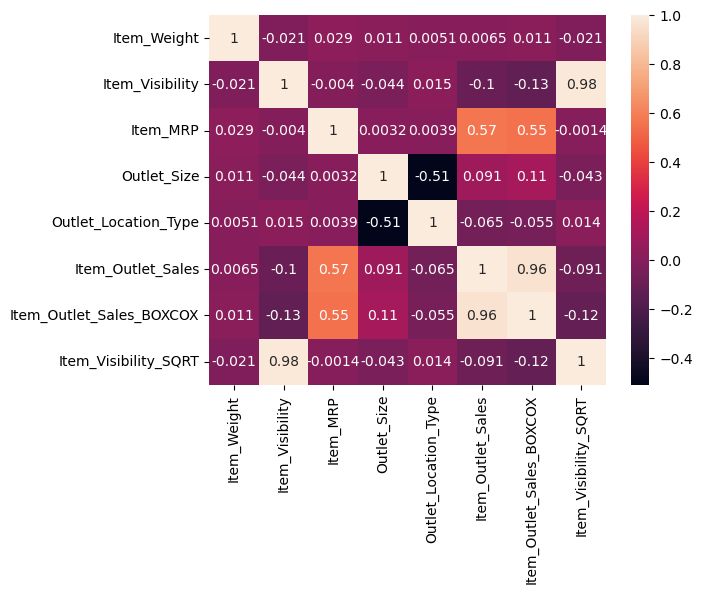

In [131]:
sns.heatmap(df_numeric.corr(),annot=True)

In [136]:
data.to_csv('Data.csv',index=False)

### ML Algorithms

In [ ]:
X=df.drop(['Item_Outlet_Sales'],axis=1)
y=df['Item_Outlet_Sales']

In [111]:
df[['Item_Outlet_Sales','Sales_Boxcox']]

,Item_Outlet_Sales,Sales_Boxcox
0,3735.1380,59.192949
1,443.4228,24.582341
2,2097.2700,46.870049
3,343.5528,22.036668
4,4022.7636,60.985079
...,...,...
7811,2778.3834,52.533003
7812,549.2850,26.919984
7813,1193.1136,37.204934
7814,1845.5976,44.492021


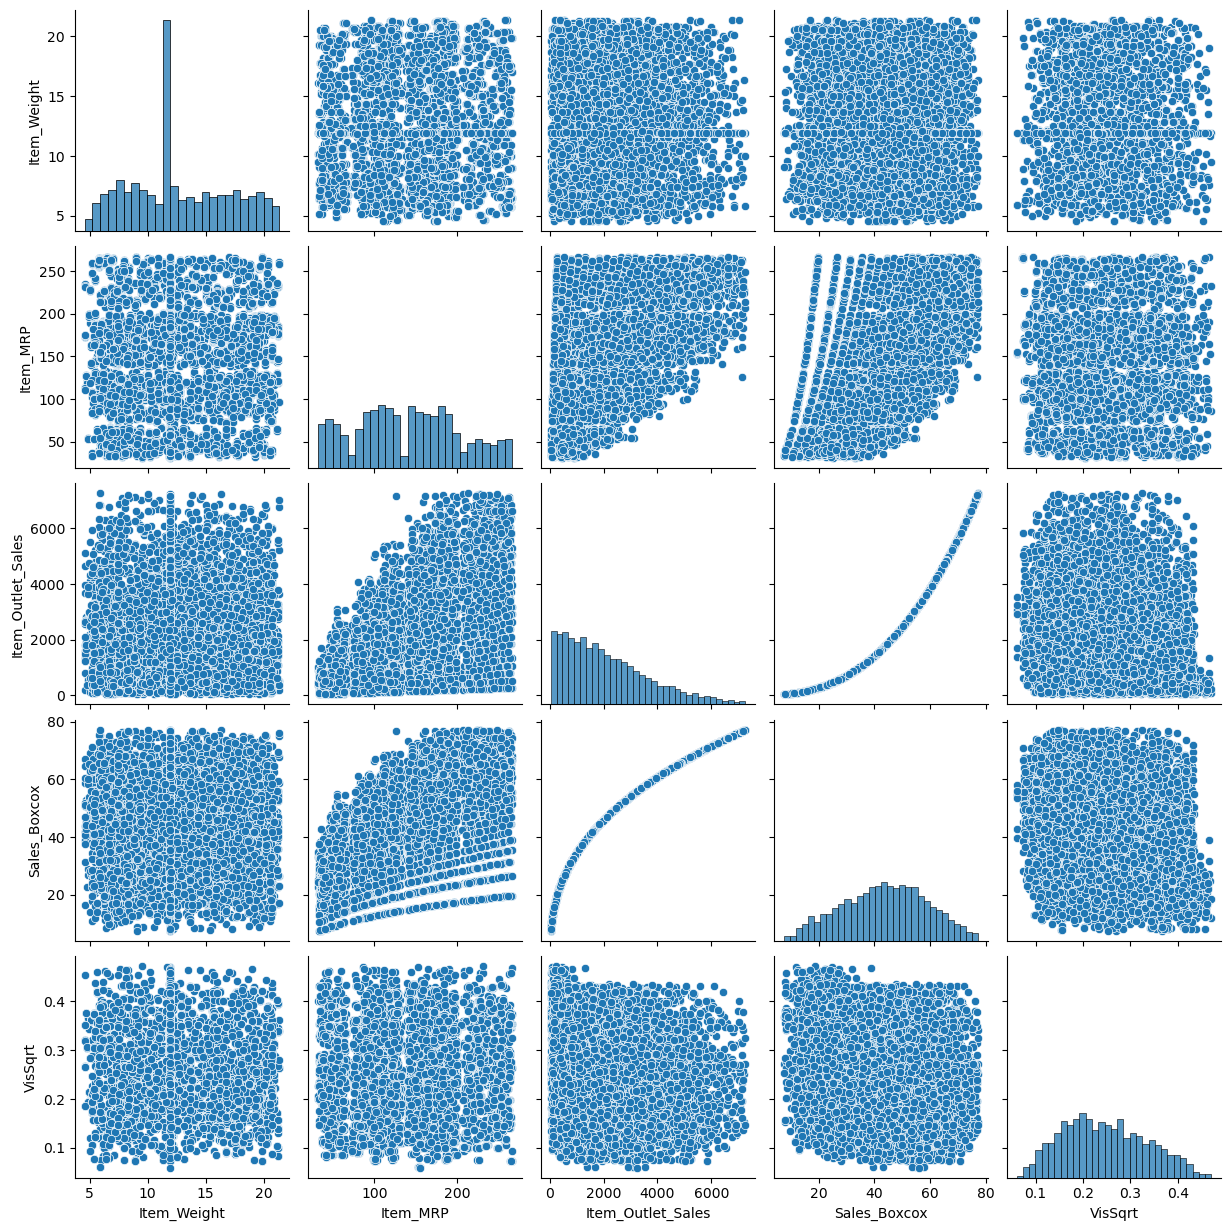

In [112]:
sns.pairplot(df)